<center><h1><u>Tenant and Property Matching System for TraceRent</u></h1></center>

<h3>BUSINESS UNDERSTANDING:</h3><center>

![My Image](images/image.png)
</center>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The real estate rental market often suffers from inefficiencies in matching tenants with properties. TraceRent, which
manages an average of 180 vacant units per month, faces challenges in finding the right tenants for each property. Tenants also struggle to find properties that meet their specific needs, such as budget, amenities, and location. This inefficiency results in longer vacancy periods for landlords and dissatisfaction among renters. The goal of this project is to solve this issue by using a structured, data-driven approach to match tenants with properties based on clearly defined categories and preferences.


<u>Our objectives are to:</u>

1.	Accurately Match Tenants with Properties: Using a supervised clustering model, we aim to categorize tenants and properties into well-defined segments and ensure matches based on multiple key factors.
2.	Reduce Vacancy Times: By improving the accuracy and efficiency of the tenant property matching process, we aim to decrease the time units remain vacant.
3.	Enhance Tenant Experience: Tenants will receive more personalized recommendations, ensuring that they find properties that better meet their needs.
4.	Build a Scalable Solution: Develop a marketplace platform (both website and mobile app) that integrates with TraceRent's existing systems to provide seamless, scalable tenant-property matching.
Scope:

<u>The project will deliver:</u>
•	A supervised clustering model that segments tenants based on their financial status, lifestyle, commuting preferences, and other relevant factors. Properties will also be categorized by price range, type, location, amenities, and more.
  
![Image](images/image_copy.png)

•	A marketplace website and mobile app where tenants can input their preferences and receive property matches, while property managers can list vacant units and access tenant profile

</u>Boundaries and Limitations:</u>

•	Dynamic Pricing: Already implemented by another team, so not part of this project.
•	Property Maintenance and Management: Rent collection, maintenance, and other operational aspects are beyond the     &nbsp;&nbsp;&nbsp;project scope.
•	International Market Expansion: The solution will focus on TraceRent’s local or regional market for now.
•	Unstructured Data: The project will work solely with structured data and will not incorporate property images or videos for matching.

<u>Impact of the Model:</u>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This tenant-property matching system is designed to address the inefficiencies in the current rental market, ensuring faster occupancy and higher tenant satisfaction. By developing a structured, smart categorization and matching mechanism integrated into a marketplace platform, we provide a scalable, long-term solution that benefits both property managers and tenants at TraceRent. This project will not only enhance operational efficiency but also offer a competitive edge in the real estate rental market.


<h1>Data Collection, Understanding & Preprocessing</h1>

In [235]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [236]:
# Load dataset
data = pd.read_csv("./dataset/property_data.csv")  # Replace with your file path

In [237]:
# Explore basic dataset info
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unit_id                   130 non-null    int64  
 1   unit_number               130 non-null    int64  
 2   prop_cat_id               130 non-null    int64  
 3   prop_name                 130 non-null    object 
 4   prop_type                 130 non-null    object 
 5   no_of_rooms               130 non-null    int64  
 6   rent                      130 non-null    int64  
 7   lease_length_in_Months    130 non-null    int64  
 8   area_sq_ft                130 non-null    int64  
 9   apt_unit_number           130 non-null    int64  
 10  street_name               130 non-null    object 
 11  community                 130 non-null    object 
 12  city                      130 non-null    object 
 13  province                  130 non-null    object 
 

In [238]:

print("\nSample Data:")
print(data.head())



Sample Data:
   unit_id  unit_number  prop_cat_id             prop_name  \
0        1          101            1          Urban Studio   
1        2          102            2    Modern One Bedroom   
2        3          103            3  Green View Townhouse   
3        4          104            4      Cozy Two Bedroom   
4        5          105            1    Luxury One Bedroom   

             prop_type  no_of_rooms  rent  lease_length_in_Months  area_sq_ft  \
0     Studio Apartment            1   950                      12         950   
1  1 Bedroom Apartment            1  1200                      12        1200   
2  3 Bedroom Apartment            3  1800                      12        1800   
3  2 Bedroom Apartment            2  1400                       6        1400   
4  1 Bedroom Apartment            1  2400                      12        2400   

   apt_unit_number  ...   gym kids_playarea party_hall backyard   deck  \
0              101  ...  True         False      Fal

In [239]:

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
unit_id                     0
unit_number                 0
prop_cat_id                 0
prop_name                   0
prop_type                   0
no_of_rooms                 0
rent                        0
lease_length_in_Months      0
area_sq_ft                  0
apt_unit_number             0
street_name                 0
community                   0
city                        0
province                    0
country                     0
latitude                    0
longitude                   0
school_proximity            0
hospital_proximity          0
transit_proximity           0
zip_code                    0
wheelchair_accessibility    0
parking                     0
gym                         0
kids_playarea               0
party_hall                  0
backyard                    0
deck                        0
in_house_laundry            0
visitor_parking             0
pool                        0
pet_friendly                0
matched_tenant_type    

In [240]:

# Analyze target variable
print("\nTarget Variable Distribution (matched_tenant_type):")
print(data['matched_tenant_type'].value_counts())



Target Variable Distribution (matched_tenant_type):
matched_tenant_type
Family       39
Singles      35
Couple       31
Roommates    25
Name: count, dtype: int64


/var/folders/9z/wgc_xt9n73q8mfnw04q92y780000gn/T/ipykernel_17325/367268024.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='matched_tenant_type', data=data, palette='viridis')


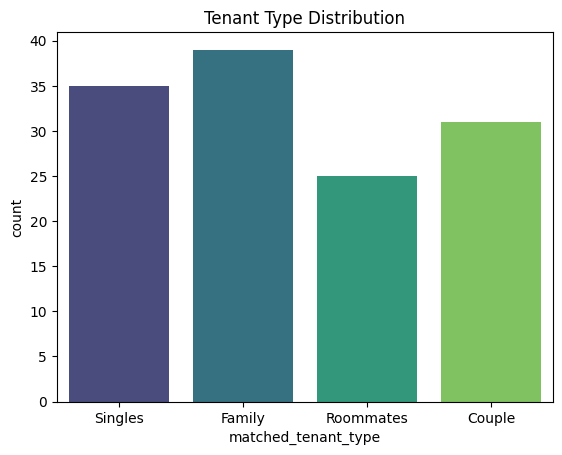

In [241]:

# Visualize the target variable distribution
sns.countplot(x='matched_tenant_type', data=data, palette='viridis')
plt.title('Tenant Type Distribution')
plt.show()


In [242]:

# Analyze numerical features
numerical_features = ['no_of_rooms', 'rent', 'lease_length_in_Months', 'area_sq_ft', 
                      'school_proximity', 'hospital_proximity', 'transit_proximity']
data[numerical_features].describe()


,no_of_rooms,rent,lease_length_in_Months,area_sq_ft,school_proximity,hospital_proximity,transit_proximity
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,1.500000,1370.769231,9.461538,1370.769231,2619.900000,7201.807692,748.307692
std,0.749677,451.345302,2.975752,451.345302,1529.242133,4202.055167,426.953038
min,1.000000,900.000000,6.000000,900.000000,108.000000,121.000000,13.000000
25%,1.000000,1100.000000,6.000000,1100.000000,1310.500000,3556.250000,396.750000
50%,1.000000,1250.000000,12.000000,1250.000000,2523.000000,7263.000000,777.500000
75%,2.000000,1400.000000,12.000000,1400.000000,4026.500000,10575.250000,1092.250000
max,3.000000,2800.000000,12.000000,2800.000000,4999.000000,14936.000000,1488.000000


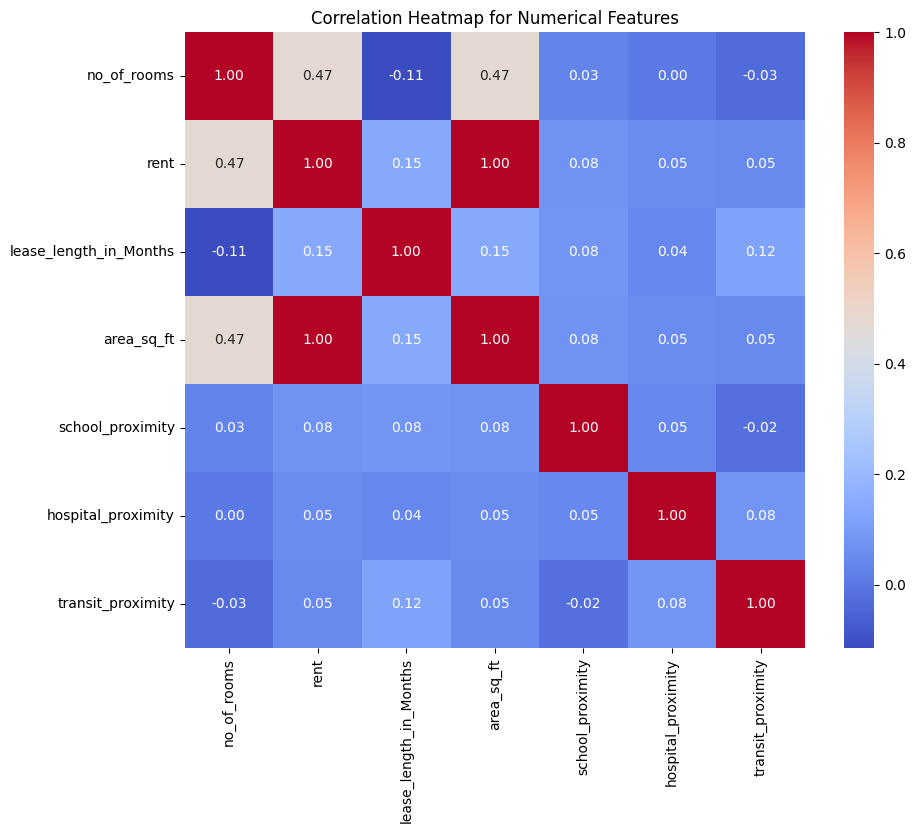

In [243]:

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()


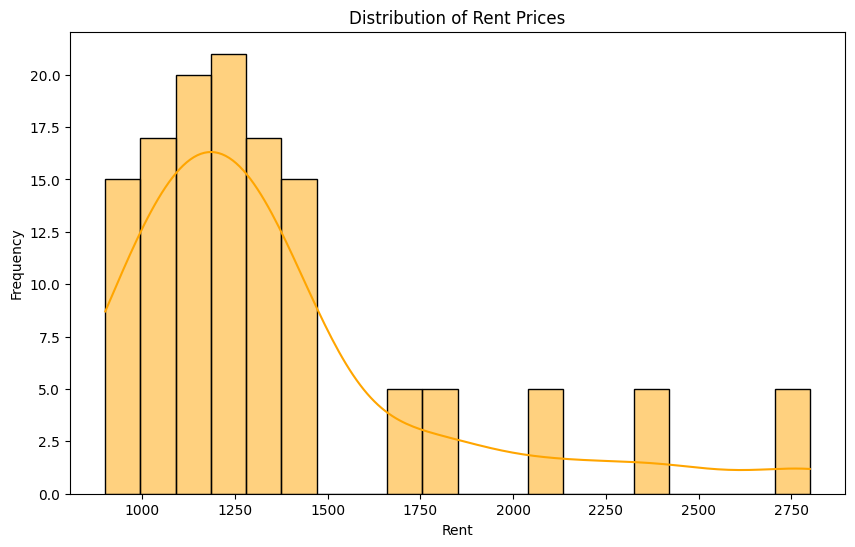

In [244]:
# Import libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Distribution of Rent Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['rent'], kde=True, color='orange', bins=20)
plt.title('Distribution of Rent Prices')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()


/var/folders/9z/wgc_xt9n73q8mfnw04q92y780000gn/T/ipykernel_17325/1163541991.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rent.index, y=avg_rent.values, palette='viridis')


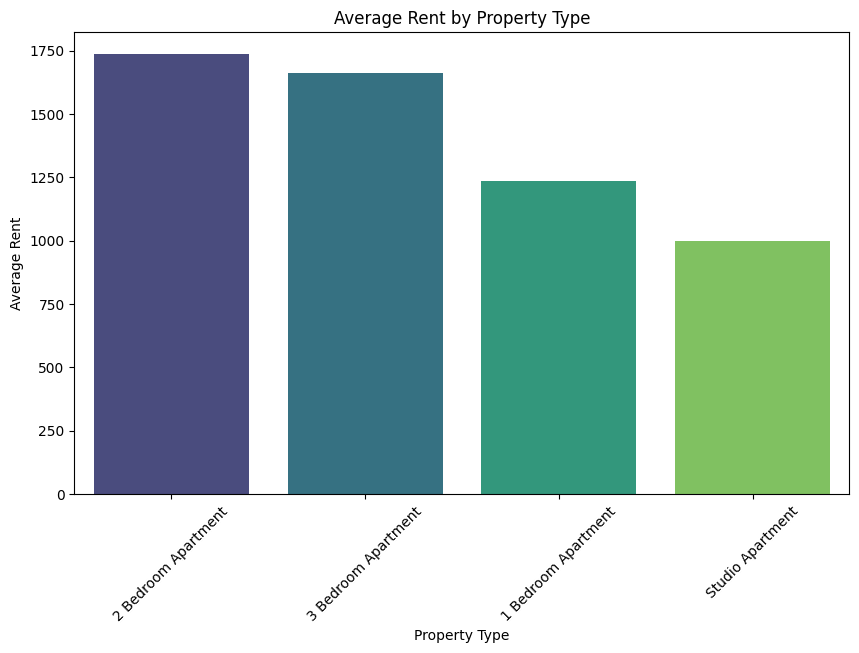

In [245]:

# 2. Average Rent by Property Type
plt.figure(figsize=(10, 6))
avg_rent = data.groupby('prop_type')['rent'].mean().sort_values(ascending=False)
sns.barplot(x=avg_rent.index, y=avg_rent.values, palette='viridis')
plt.title('Average Rent by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Rent')
plt.xticks(rotation=45)
plt.show()


/var/folders/9z/wgc_xt9n73q8mfnw04q92y780000gn/T/ipykernel_17325/890664908.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='matched_tenant_type', y='school_proximity', data=data, palette='pastel')


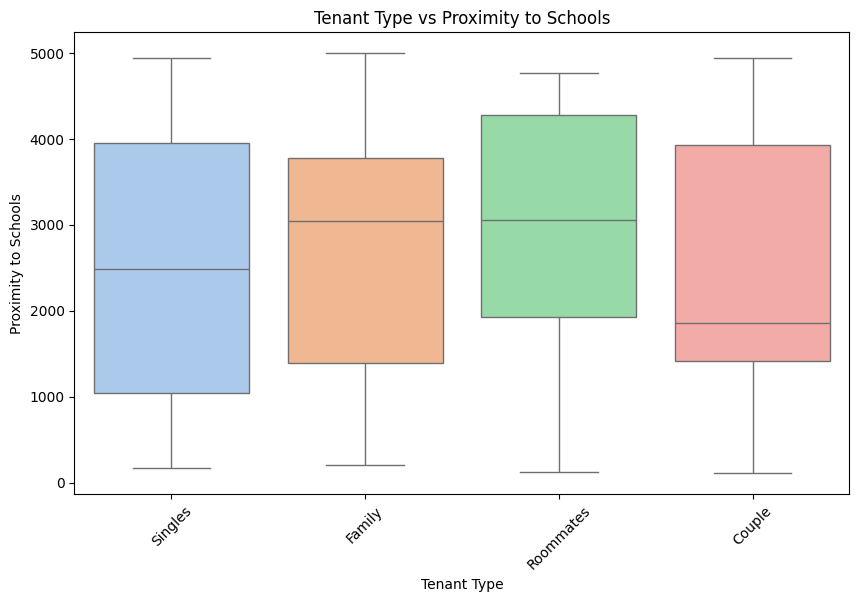

In [246]:

# 3. Tenant Type vs Proximity to Schools
plt.figure(figsize=(10, 6))
sns.boxplot(x='matched_tenant_type', y='school_proximity', data=data, palette='pastel')
plt.title('Tenant Type vs Proximity to Schools')
plt.xlabel('Tenant Type')
plt.ylabel('Proximity to Schools')
plt.xticks(rotation=45)
plt.show()


/var/folders/9z/wgc_xt9n73q8mfnw04q92y780000gn/T/ipykernel_17325/1302668460.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='matched_tenant_type', y='rent', data=data, palette='coolwarm', scale='count')
/var/folders/9z/wgc_xt9n73q8mfnw04q92y780000gn/T/ipykernel_17325/1302668460.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='matched_tenant_type', y='rent', data=data, palette='coolwarm', scale='count')


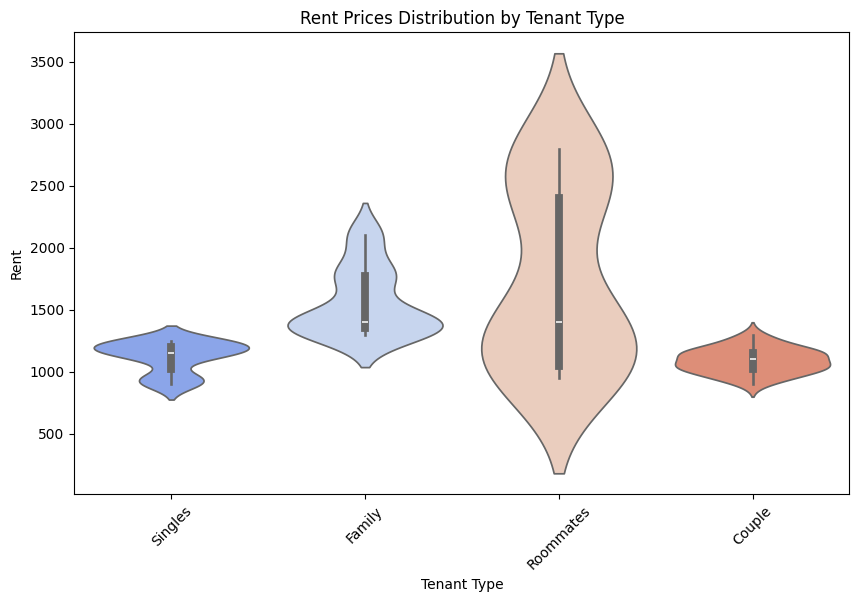

In [247]:

# 4. Rent Prices by Tenant Type
plt.figure(figsize=(10, 6))
sns.violinplot(x='matched_tenant_type', y='rent', data=data, palette='coolwarm', scale='count')
plt.title('Rent Prices Distribution by Tenant Type')
plt.xlabel('Tenant Type')
plt.ylabel('Rent')
plt.xticks(rotation=45)
plt.show()


/var/folders/9z/wgc_xt9n73q8mfnw04q92y780000gn/T/ipykernel_17325/275613634.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='matched_tenant_type', y='amenity_count', data=data, palette='cubehelix')


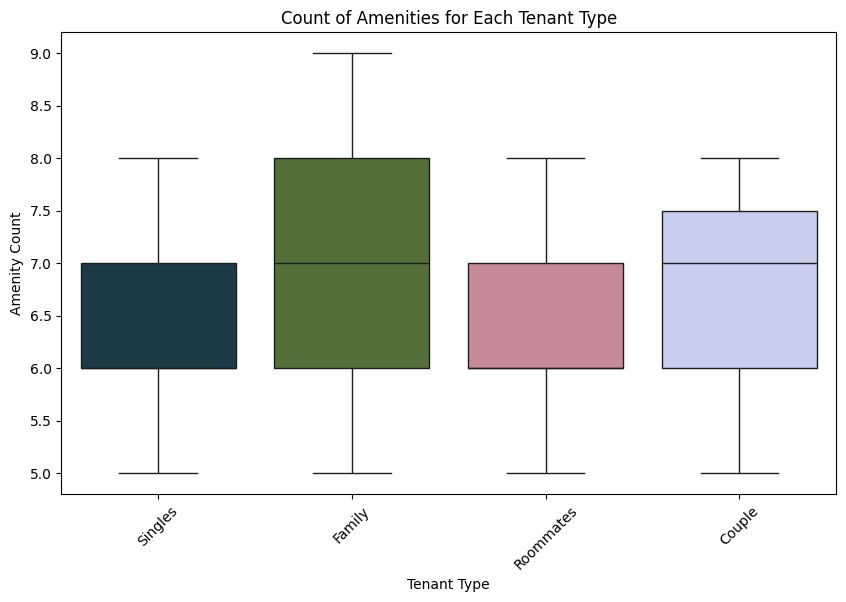

In [248]:

# 5. Count of Amenities for Each Tenant Type
amenities_cols = ['wheelchair_accessibility', 'parking', 'gym', 'kids_playarea', 
                  'party_hall', 'backyard', 'deck', 'in_house_laundry', 
                  'visitor_parking', 'pool', 'pet_friendly']
data['amenity_count'] = data[amenities_cols].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.boxplot(x='matched_tenant_type', y='amenity_count', data=data, palette='cubehelix')
plt.title('Count of Amenities for Each Tenant Type')
plt.xlabel('Tenant Type')
plt.ylabel('Amenity Count')
plt.xticks(rotation=45)
plt.show()


/var/folders/9z/wgc_xt9n73q8mfnw04q92y780000gn/T/ipykernel_17325/3070073551.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='prop_type', y='area_sq_ft', data=data, palette='Set3')


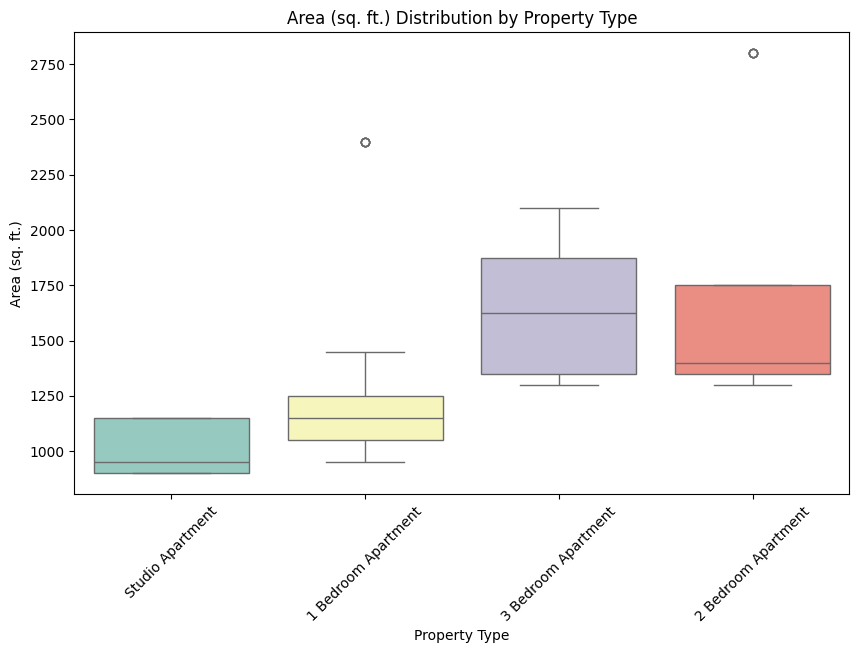

In [249]:

# 6. Area (sq. ft.) by Property Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='prop_type', y='area_sq_ft', data=data, palette='Set3')
plt.title('Area (sq. ft.) Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Area (sq. ft.)')
plt.xticks(rotation=45)
plt.show()


# c.	Data Preparation

In [250]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

In [251]:

# Encode categorical columns
categorical_features = ['prop_type', 'city', 'province', 'country', 
                        'wheelchair_accessibility', 'parking', 'gym', 
                        'kids_playarea', 'party_hall', 'backyard', 
                        'deck', 'in_house_laundry', 'visitor_parking', 
                        'pool', 'pet_friendly']


In [252]:

# Label encoding for matched_tenant_type
label_encoder = LabelEncoder()
data['matched_tenant_type'] = label_encoder.fit_transform(data['matched_tenant_type'])

# One-hot encode categorical features
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)


In [253]:
# Analyze numerical features
numerical_features = ['no_of_rooms', 'rent', 'lease_length_in_Months', 'area_sq_ft', 
                      'school_proximity', 'hospital_proximity', 'transit_proximity']
data[numerical_features].describe()


,no_of_rooms,rent,lease_length_in_Months,area_sq_ft,school_proximity,hospital_proximity,transit_proximity
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,1.500000,1370.769231,9.461538,1370.769231,2619.900000,7201.807692,748.307692
std,0.749677,451.345302,2.975752,451.345302,1529.242133,4202.055167,426.953038
min,1.000000,900.000000,6.000000,900.000000,108.000000,121.000000,13.000000
25%,1.000000,1100.000000,6.000000,1100.000000,1310.500000,3556.250000,396.750000
50%,1.000000,1250.000000,12.000000,1250.000000,2523.000000,7263.000000,777.500000
75%,2.000000,1400.000000,12.000000,1400.000000,4026.500000,10575.250000,1092.250000
max,3.000000,2800.000000,12.000000,2800.000000,4999.000000,14936.000000,1488.000000


In [254]:

# Scale numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [255]:

# Define features and target
X = data.drop(columns=['matched_tenant_type', 'unit_id', 'unit_number', 
                       'prop_name', 'apt_unit_number', 'street_name', 'zip_code'])
y = data['matched_tenant_type']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split into training and testing sets:")
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")



Data split into training and testing sets:
Training Set: (104, 30), Testing Set: (26, 30)


### Feature Engineering

In [256]:
# Updated list of amenity columns based on the dataset
amenities = [
    'parking_1', 'parking_2', 'gym_True', 'kids_playarea_True', 
    'party_hall_True', 'backyard_True', 'deck_True', 
    'in_house_laundry_True', 'visitor_parking_True', 
    'pool_True', 'pet_friendly_True'
]

In [257]:
print(X_train.columns)

Index(['prop_cat_id', 'no_of_rooms', 'rent', 'lease_length_in_Months',
       'area_sq_ft', 'community', 'latitude', 'longitude', 'school_proximity',
       'hospital_proximity', 'transit_proximity', 'amenity_count',
       'prop_type_2 Bedroom Apartment', 'prop_type_3 Bedroom Apartment',
       'prop_type_Studio Apartment', 'city_Edmonton', 'city_Toronto',
       'province_Ontario', 'wheelchair_accessibility_True', 'parking_1',
       'parking_2', 'gym_True', 'kids_playarea_True', 'party_hall_True',
       'backyard_True', 'deck_True', 'in_house_laundry_True',
       'visitor_parking_True', 'pool_True', 'pet_friendly_True'],
      dtype='object')


In [258]:
# Verify that all the amenity columns exist in the dataset
missing_columns = set(amenities).difference(X_train.columns)
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All amenity columns are present.")

All amenity columns are present.


In [259]:

# Calculate amenity score based on the updated columns
X_train['amenity_score'] = X_train[amenities].sum(axis=1)
X_test['amenity_score'] = X_test[amenities].sum(axis=1)

# Verify the new feature
print(X_train[['amenity_score'] + amenities].head())


    amenity_score  parking_1  parking_2  gym_True  kids_playarea_True  \
70              6       True      False      True               False   
78              6       True      False      True                True   
47              7       True      False      True                True   
0               5       True      False      True               False   
12              7      False       True      True               False   

    party_hall_True  backyard_True  deck_True  in_house_laundry_True  \
70             True           True      False                   True   
78             True           True      False                   True   
47            False           True       True                   True   
0             False          False      False                   True   
12            False           True       True                   True   

    visitor_parking_True  pool_True  pet_friendly_True  
70                 False       True              False  
78            

In [260]:
print(X_train.columns)

Index(['prop_cat_id', 'no_of_rooms', 'rent', 'lease_length_in_Months',
       'area_sq_ft', 'community', 'latitude', 'longitude', 'school_proximity',
       'hospital_proximity', 'transit_proximity', 'amenity_count',
       'prop_type_2 Bedroom Apartment', 'prop_type_3 Bedroom Apartment',
       'prop_type_Studio Apartment', 'city_Edmonton', 'city_Toronto',
       'province_Ontario', 'wheelchair_accessibility_True', 'parking_1',
       'parking_2', 'gym_True', 'kids_playarea_True', 'party_hall_True',
       'backyard_True', 'deck_True', 'in_house_laundry_True',
       'visitor_parking_True', 'pool_True', 'pet_friendly_True',
       'amenity_score'],
      dtype='object')


# Supervised Clustering

In [261]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [262]:

# Step 1: Data Splitting
X = data.drop(columns=['matched_tenant_type'])  # Features
y = data['matched_tenant_type']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [263]:

# Step 2: Preprocessing
# Identify categorical and numeric columns
categorical_columns = ['community']
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove categorical columns from numeric list
numeric_columns = [col for col in numeric_columns if col not in categorical_columns]


In [264]:
# Apply OneHotEncoder for categorical columns
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

In [265]:
# Transform and integrate encoded columns
encoded_train = encoder.fit_transform(X_train[categorical_columns])
encoded_test = encoder.transform(X_test[categorical_columns])

encoded_train_df = pd.DataFrame(encoded_train, 
                                columns=encoder.get_feature_names_out(categorical_columns),
                                index=X_train.index)
encoded_test_df = pd.DataFrame(encoded_test, 
                               columns=encoder.get_feature_names_out(categorical_columns),
                               index=X_test.index)

In [266]:

# Drop original categorical columns and add encoded ones
X_train = X_train.drop(columns=categorical_columns).join(encoded_train_df)
X_test = X_test.drop(columns=categorical_columns).join(encoded_test_df)


In [267]:

# Step 3: Feature Scaling
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


In [268]:
#  Drop all non-numeric columns (including string columns like 'street_name', 'prop_name', etc.)
X_train_numeric = X_train.select_dtypes(include=[np.number])  # Select only numeric columns
X_test_numeric = X_test.select_dtypes(include=[np.number])  # Select only numeric columns


# Model Building

In [269]:
# Step 4: Apply KMeans clustering on the numeric columns
kmeans = KMeans(n_clusters=len(y.unique()), random_state=42)
X_train['cluster'] = kmeans.fit_predict(X_train_numeric)  # Add cluster to the original X_train
X_test['cluster'] = kmeans.predict(X_test_numeric)  # Add cluster to the original X_test


In [270]:

# Step 5: Map clusters to tenant types
cluster_labels = pd.DataFrame({'cluster': X_train['cluster'], 'matched_tenant_type': y_train})
cluster_mapping = cluster_labels.groupby('cluster')['matched_tenant_type'].agg(lambda x: x.mode()[0])


In [271]:

# Step 6: Add cluster labels to training and testing sets
X_train['predicted_tenant_type'] = X_train['cluster'].map(cluster_mapping)
X_test['predicted_tenant_type'] = X_test['cluster'].map(cluster_mapping)

# Now, X_train and X_test have the 'predicted_tenant_type' based on the clusters


In [272]:

# Step 6: Classification Report
print("Training Classification Report:")
print(classification_report(y_train, X_train['predicted_tenant_type']))

print("\nTesting Classification Report:")
print(classification_report(y_test, X_test['predicted_tenant_type']))


Training Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.72      0.48        25
           1       1.00      0.52      0.68        31
           2       0.73      0.40      0.52        20
           3       0.56      0.54      0.55        28

    accuracy                           0.55       104
   macro avg       0.66      0.54      0.56       104
weighted avg       0.67      0.55      0.56       104


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.50      0.43         6
           1       1.00      0.75      0.86         8
           2       0.75      0.60      0.67         5
           3       0.50      0.57      0.53         7

    accuracy                           0.62        26
   macro avg       0.66      0.61      0.62        26
weighted avg       0.67      0.62      0.63        26



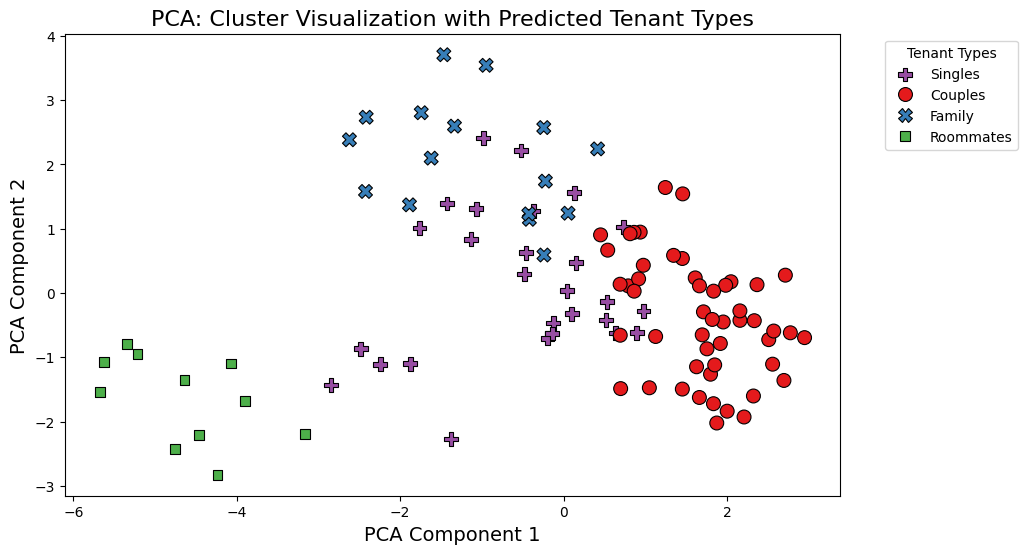

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Step 1: Use PCA for dimensionality reduction (to 2D)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_numeric)  # PCA transformation on numeric features

# Step 2: Create a scatter plot with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=X_train['predicted_tenant_type'], 
                palette='Set1', style=X_train['predicted_tenant_type'], s=100, edgecolor='k')

# Add labels and title
plt.title("PCA: Cluster Visualization with Predicted Tenant Types", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
# Step 3: Modify the legend to show tenant types instead of cluster numbers
tenant_type_mapping = {0: 'Singles', 1: 'Couples', 2: 'Family', 3: 'Roommates'}
# Replace the numeric labels with tenant type names in the legend
plt.legend(title='Tenant Types', labels=[tenant_type_mapping[i] for i in range(len(tenant_type_mapping))],
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


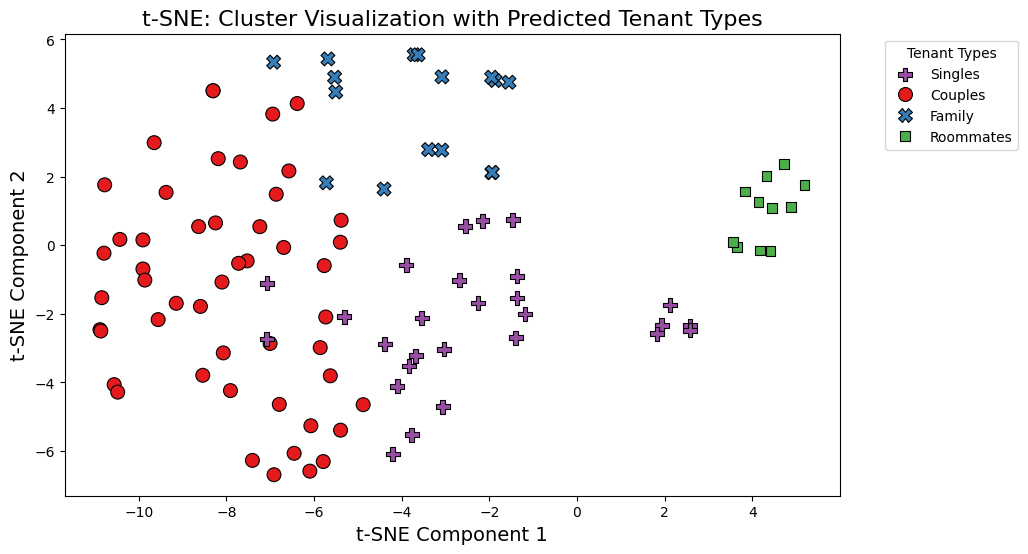

In [274]:
from sklearn.manifold import TSNE

# Step 1: Use t-SNE for dimensionality reduction (to 2D)
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_numeric)  # t-SNE transformation on numeric features

# Step 2: Create a scatter plot with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=X_train['predicted_tenant_type'], 
                palette='Set1', style=X_train['predicted_tenant_type'], s=100, edgecolor='k')

# Add labels and title
plt.title("t-SNE: Cluster Visualization with Predicted Tenant Types", fontsize=16)
plt.xlabel("t-SNE Component 1", fontsize=14)
plt.ylabel("t-SNE Component 2", fontsize=14)# Step 3: Modify the legend to show tenant types instead of cluster numbers
tenant_type_mapping = {0: 'Singles', 1: 'Couples', 2: 'Family', 3: 'Roommates'}
# Replace the numeric labels with tenant type names in the legend
plt.legend(title='Tenant Types', labels=[tenant_type_mapping[i] for i in range(len(tenant_type_mapping))],
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [275]:
# Step 7: Supervised Model (RandomForest)

# Train a Random Forest Classifier using the original features + cluster labels
# Drop the 'cluster' and 'predicted_tenant_type' columns as they're the output we want to predict
# Drop non-numeric columns
X_train_supervised = X_train.drop(columns=['cluster', 'predicted_tenant_type', 'street_name','zip_code','prop_name'])
X_test_supervised = X_test.drop(columns=['cluster', 'predicted_tenant_type', 'street_name','zip_code','prop_name'])


In [276]:
print("Is 'cluster' dropped from X_train_supervised?", 'cluster' not in X_train_supervised.columns)
print("Is 'predicted_tenant_type' dropped from X_train_supervised?", 'predicted_tenant_type' not in X_train_supervised.columns)
print("Is 'street_name' dropped from X_train_supervised?", 'street_name' not in X_train_supervised.columns)
print("Is 'zip_code' dropped from X_train_supervised?", 'zip_code' not in X_train_supervised.columns)

Is 'cluster' dropped from X_train_supervised? True
Is 'predicted_tenant_type' dropped from X_train_supervised? True
Is 'street_name' dropped from X_train_supervised? True
Is 'zip_code' dropped from X_train_supervised? True


In [277]:

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_supervised, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_supervised)

# Evaluate performance
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy Score
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       1.00      1.00      1.00         8
           2       0.75      0.60      0.67         5
           3       1.00      1.00      1.00         7

    accuracy                           0.88        26
   macro avg       0.87      0.86      0.86        26
weighted avg       0.89      0.88      0.88        26


Confusion Matrix:
[[5 0 1 0]
 [0 8 0 0]
 [2 0 3 0]
 [0 0 0 7]]
Accuracy Score: 0.88


# Confusion Matrix Heatmap

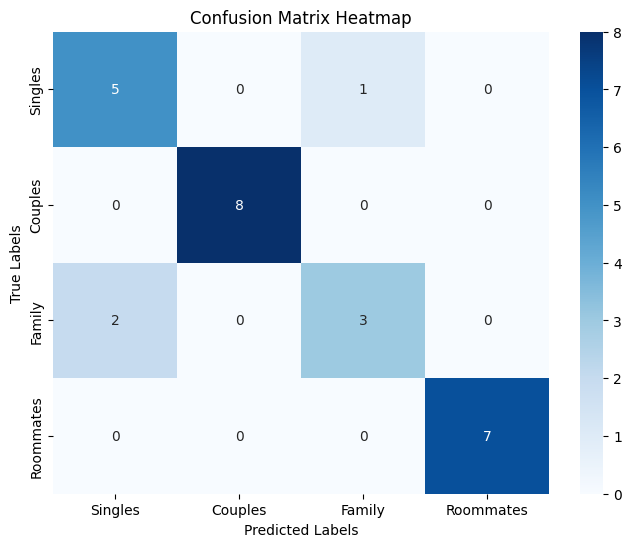

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Singles', 'Couples', 'Family', 'Roommates'], yticklabels=['Singles', 'Couples', 'Family', 'Roommates'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Model Accuracy Comparison (Training vs. Testing)


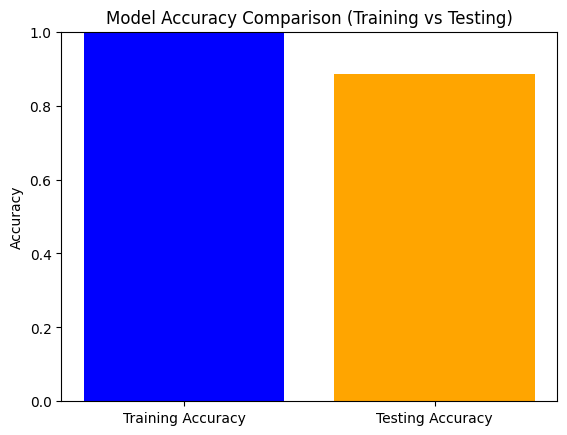

In [279]:
from sklearn.metrics import accuracy_score

# Accuracy on training data
y_train_pred = clf.predict(X_train_supervised)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Accuracy on testing data (already computed)
test_accuracy = accuracy_score(y_test, y_pred)

# Plot the accuracy comparison
accuracies = [train_accuracy, test_accuracy]
labels = ['Training Accuracy', 'Testing Accuracy']

plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison (Training vs Testing)')
plt.ylabel('Accuracy')
plt.show()


# Feature Importance Plot

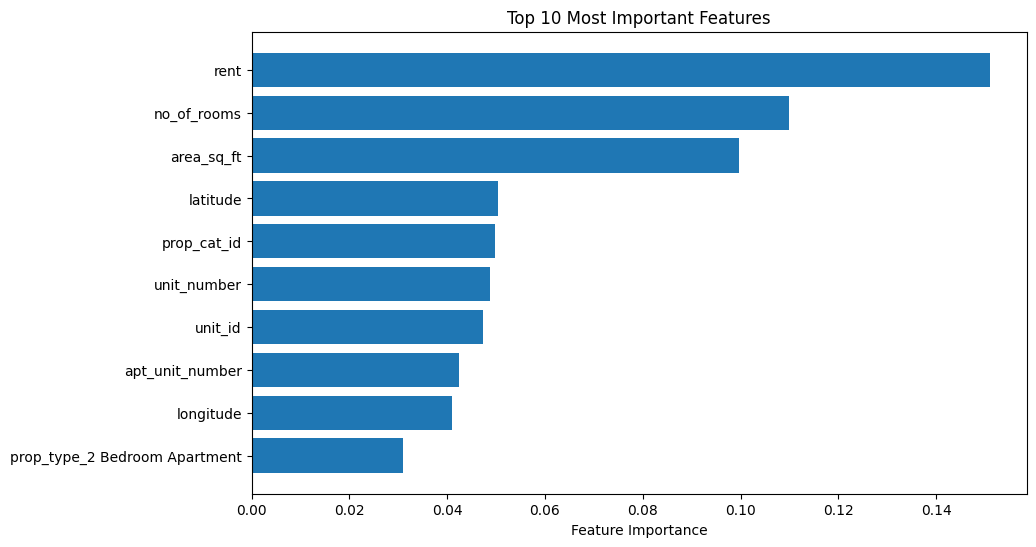

In [280]:
import numpy as np

# Get feature importance from the RandomForest model
feature_importances = clf.feature_importances_

# Get feature names from the training data (after one-hot encoding)
feature_names = X_train_supervised.columns

# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(range(10), feature_importances[indices[:10]], align='center')
plt.yticks(range(10), feature_names[indices[:10]])
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()


# ROC Curve 

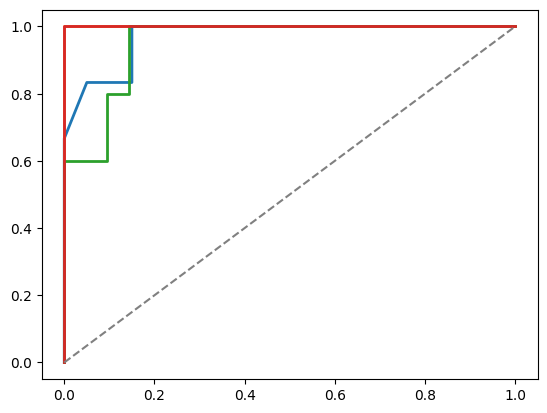

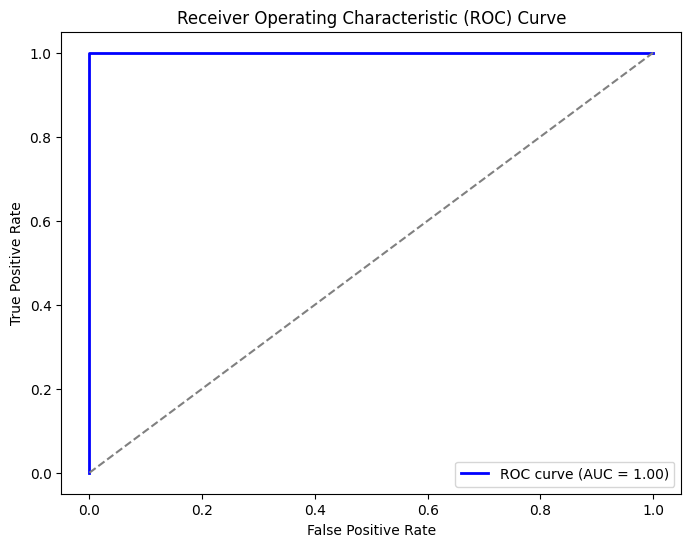

In [282]:
from sklearn.metrics import roc_curve, auc

# Binarize the output for ROC Curve (For multi-class, you would need to use one-vs-rest strategy)
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
y_test_bin = lb.transform(y_test)

# Compute ROC curve and AUC for each class
# For multi-class classification, iterate through each class and plot its ROC curve
for i in range(y_train_bin.shape[1]):
    # Compute ROC curve and AUC for each class
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], clf.predict_proba(X_test_supervised)[:, i])
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for the current class
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} ROC curve (AUC = {roc_auc:.2f})')

# Plot diagonal line for random classifier (chance level)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Precision-Recall Curve

Shape of y_test_bin: (26, 4)
Shape of predicted probabilities: (26, 4)


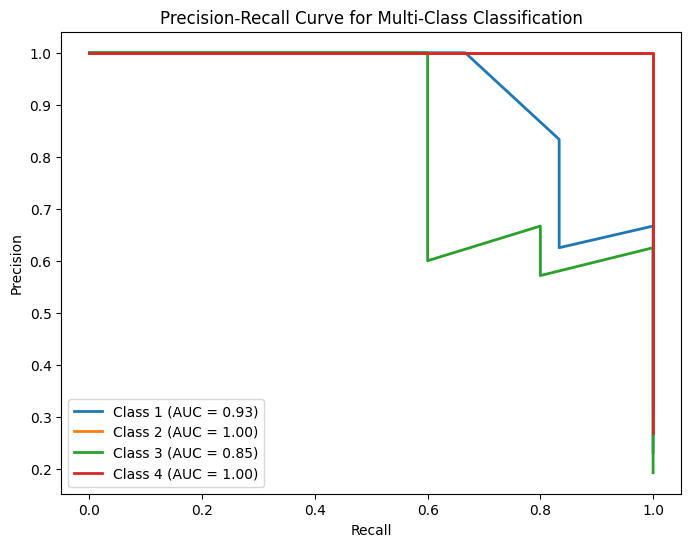

In [287]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Check the shape of y_test_bin
print(f"Shape of y_test_bin: {y_test_bin.shape}")

# Check the shape of predicted probabilities
y_pred_proba = clf.predict_proba(X_test_supervised)
print(f"Shape of predicted probabilities: {y_pred_proba.shape}")

# For each class in multi-class, compute precision-recall curve
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    precision, recall, thresholds = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {i+1} (AUC = {auc(recall, precision):.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-Class Classification')
plt.legend(loc='best')
plt.show()

# Model Training vs Testing Performance

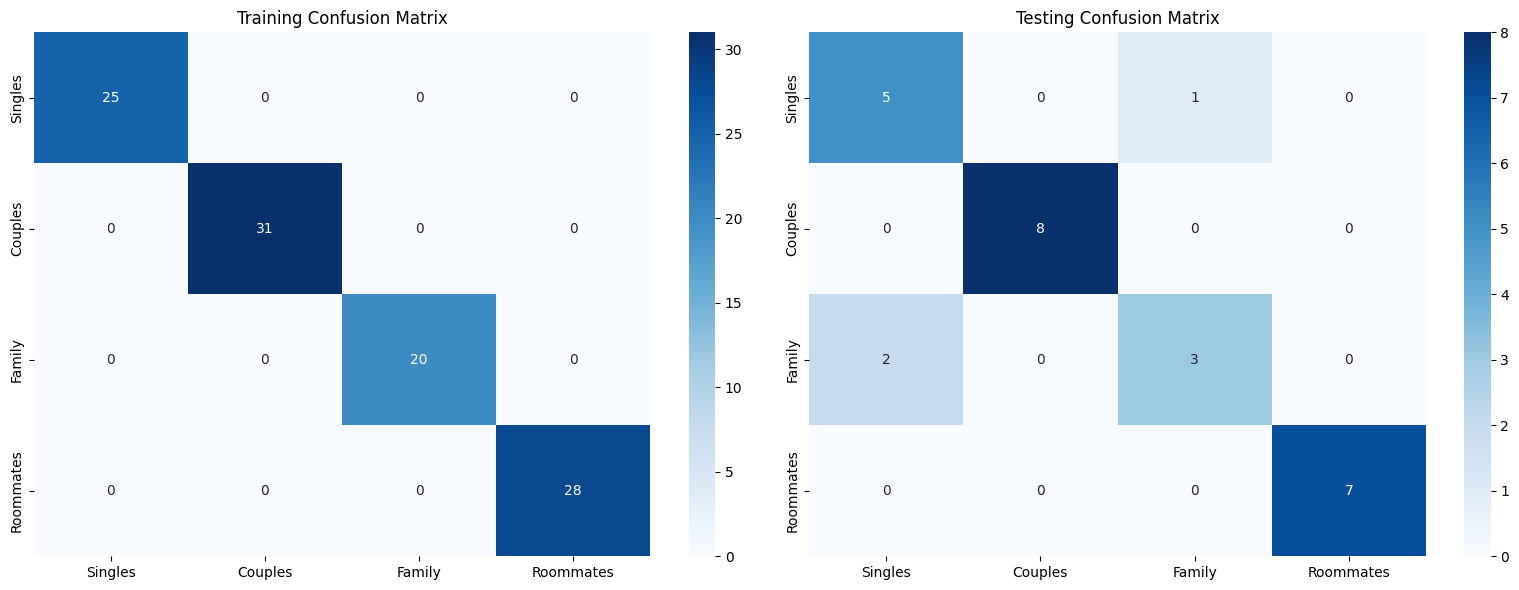

In [288]:
# Calculate confusion matrix for training set
cm_train = confusion_matrix(y_train, y_train_pred)

# Plot confusion matrix for training and testing data side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot training confusion matrix
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", ax=axes[0], xticklabels=['Singles', 'Couples', 'Family', 'Roommates'], yticklabels=['Singles', 'Couples', 'Family', 'Roommates'])
axes[0].set_title('Training Confusion Matrix')

# Plot testing confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[1], xticklabels=['Singles', 'Couples', 'Family', 'Roommates'], yticklabels=['Singles', 'Couples', 'Family', 'Roommates'])
axes[1].set_title('Testing Confusion Matrix')

plt.tight_layout()
plt.show()
